**Imports and workspace setting**

In [18]:
import numpy as np
import csv
import scipy.stats as stat
import matplotlib.pyplot as plt
%matplotlib inline
import math
import matplotlib.mlab as mlab

In [3]:
my_data = np.genfromtxt('PSID.csv', delimiter=',')
my_data = np.delete(my_data, (0), axis=0)

In [4]:
age = my_data[:,3]
education = my_data[:,4]
earning = my_data[:,5]
hours = my_data[:,6]
num_children = my_data[:,7]

Text(0.5, 1.0, '$y_1=x$')

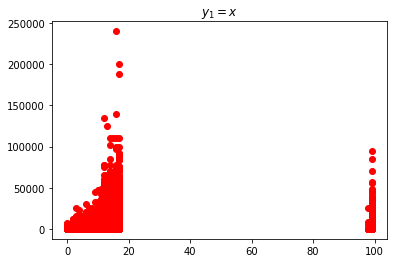

In [5]:
plt.figure()
plt.plot(education, earning, 'ro')
plt.title('$y_1=x$')

Text(0.5, 1.0, '$y_1=x$')

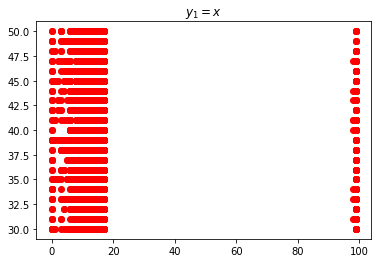

In [6]:
plt.figure()
plt.plot(education, age, 'ro')
plt.title('$y_1=x$')

14244.506177924217


Text(0.5, 1.0, 'Earnings Distribution')

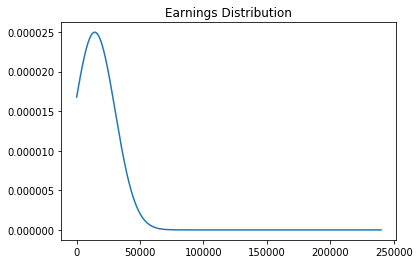

In [10]:
earning.sort()
mean_earnings = np.mean(earning)
sigma_earnings = np.std(earning)
pdf_earnings = stat.norm.pdf(earning, mean_earnings, sigma_earnings)
print(mean_earnings)
plt.plot(earning, pdf_earnings)
plt.title("Earnings Distribution")

38.46293245469522


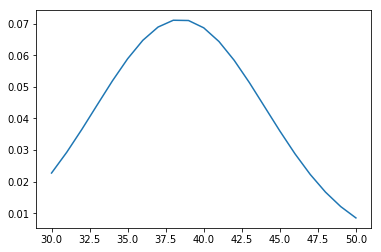

In [11]:
age.sort()
mean_age = np.mean(age)
sigma_age = np.std(age)
pdf_age = stat.norm.pdf(age, mean_age, sigma_age)

print(mean_age)
plt.plot(age, pdf_age)

In [21]:
sample1 = np.random.choice(age, size=100)  ## Picks 100 samples from the population randomly
sampleMean1 = np.mean(sample1)
sampleStd1 = np.std(sample1)
sampleSigma1 = math.sqrt(sampleStd1)

sample2 = np.random.choice(age, size=100)  ## Picks 100 samples from the population randomly
sampleMean2 = np.mean(sample2)
sampleStd2 = np.std(sample2)
sampleSigma2 = math.sqrt(sampleStd2)

C:\Users\hesithaw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
C:\Users\hesithaw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hesithaw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  after removing the cwd from sys.path.


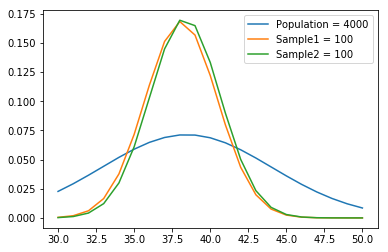

In [22]:
plt.figure()
plt.plot(age,mlab.normpdf(age, mean_age, sigma_age), label='Population = 4000')
plt.plot(age,mlab.normpdf(age, sampleMean1, sampleSigma1), label='Sample1 = 100')
plt.plot(age,mlab.normpdf(age, sampleMean2, sampleSigma2), label='Sample2 = 100')
plt.legend()
plt.show()